# Introduction

#### This notebook presents the exploratory data analysis and closing price prediction using LSTM of FAANG (Facebook/Meta, Amazon, Apple, Netflix, Google). The closing price prediction uses adjusted closing price as the variable. Alongwith, the date range for the prediction of each of the 5 companies starts from their respective date of IPO offerings. 

#### For exploratory data analysis, the date range selected is of past 1 year (July 2023 to July 2024). 

In [5]:
!pip install tensorflow
!pip install keras
!pip install -q yfinance
!pip install pandas_datareader

#LOADING LIBRARIES

import numpy as np 
import pandas as pd 
import tensorflow as tf

import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline


#FOR READING STOCK DATA FROM YAHOO 

from pandas_datareader.data import DataReader 
import yfinance as yf 
from pandas_datareader import data as pdr 

yf.pdr_override()


#FOR TIME STAMPS 

from datetime import datetime 


#TECH STOCKS WE'LL BE USING

tech_list =['META','AMZN','AAPL','NFLX','GOOG']


#SETTING UP START AND END DATE FOR DATA GRAB 

tech_list =['META','AMZN','AAPL','NFLX','GOOG']

end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [META, AMZN, AAPL, NFLX, GOOG]
company_name = ["META","AMZN","AAPL","NFLX","GOOG"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis = 0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-21,178.490005,182.511993,178.059998,180.259995,180.259995,59728000,GOOG
2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300,GOOG
2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18917700,GOOG
2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700,GOOG
2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700,GOOG
2024-06-28,185.720001,186.580002,183.324997,183.419998,183.419998,23032400,GOOG
2024-07-01,184.479996,185.339996,182.729996,184.490005,184.490005,11815900,GOOG
2024-07-02,183.470001,186.949997,183.059998,186.610001,186.610001,12555500,GOOG
2024-07-03,186.300003,187.619995,185.384995,187.389999,187.389999,7409100,GOOG


In [6]:
#DESCRIBING THE STATS OF THE STOCKS

META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,391.604207,396.717301,386.864196,392.128056,391.545304,1.853160e+07
std,84.846637,85.849748,83.998537,85.155851,85.244196,1.009117e+07
min,279.029999,285.690002,274.380005,283.250000,282.669159,5.467500e+06
25%,312.797501,316.167496,308.152489,311.999992,311.360168,1.269592e+07
50%,355.824997,358.990005,352.750000,356.129990,355.399673,1.643845e+07
75%,481.047493,488.962494,475.797508,482.202492,481.705978,2.047845e+07
max,529.280029,540.859924,518.890015,539.909973,539.909973,8.461550e+07


In [7]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.887619,158.527777,155.245278,156.995437,156.995437,4.757185e+07
std,22.083800,22.230286,21.956711,22.142209,22.142209,1.774228e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,2.237840e+07
25%,136.379997,137.712502,134.902500,136.630001,136.630001,3.718285e+07
50%,153.000000,154.029999,151.850006,153.360001,153.360001,4.407735e+07
75%,178.822506,180.352505,176.607498,178.902496,178.902496,5.296302e+07
max,199.940002,200.550003,198.169998,200.000000,200.000000,1.529387e+08


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,184.520833,186.139087,183.061905,184.630635,184.169841,6.038418e+07
std,11.573593,11.796552,11.473825,11.697146,11.755700,2.472741e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801842,4.678918e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502808,5.373395e+07
75%,191.452503,192.684998,190.247505,191.602497,191.044178,6.615335e+07
max,221.649994,226.449997,221.649994,226.339996,226.339996,2.464214e+08


In [9]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,514.708611,520.959682,508.746152,515.027580,515.027580,4.704324e+06
std,95.170048,96.201316,94.579421,96.007463,96.007463,3.532276e+06
min,351.000000,354.790009,344.730011,346.190002,346.190002,1.403500e+06
25%,435.172508,438.219994,428.605003,434.377487,434.377487,2.881525e+06
50%,486.264999,490.639999,478.019989,485.509995,485.509995,3.774950e+06
75%,610.977478,616.622513,604.167496,610.530014,610.530014,5.069275e+06
max,685.000000,697.489990,678.140015,690.650024,690.650024,2.807440e+07


In [10]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,145.670643,147.183095,144.442496,145.905278,145.754206,2.157429e+07
std,17.229341,17.394618,17.211108,17.439477,17.450460,8.456126e+06
min,116.760002,118.224998,115.830002,116.870003,116.737160,7.409100e+06
25%,133.307507,134.690002,132.113754,133.315006,133.163475,1.670305e+07
50%,139.764999,141.047501,138.514503,139.900002,139.740982,1.921710e+07
75%,154.198750,156.576252,153.055000,155.902496,155.725288,2.306810e+07
max,187.350006,192.259995,187.345001,191.960007,191.960007,5.972800e+07


In [11]:
#DATA INFORMATION 

META.info()
AMZN.info()
AAPL.info()
NFLX.info()
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-06 to 2024-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-06 to 2024-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5 

### EXPLORATORY DATA ANALYSIS

#### Closing Price

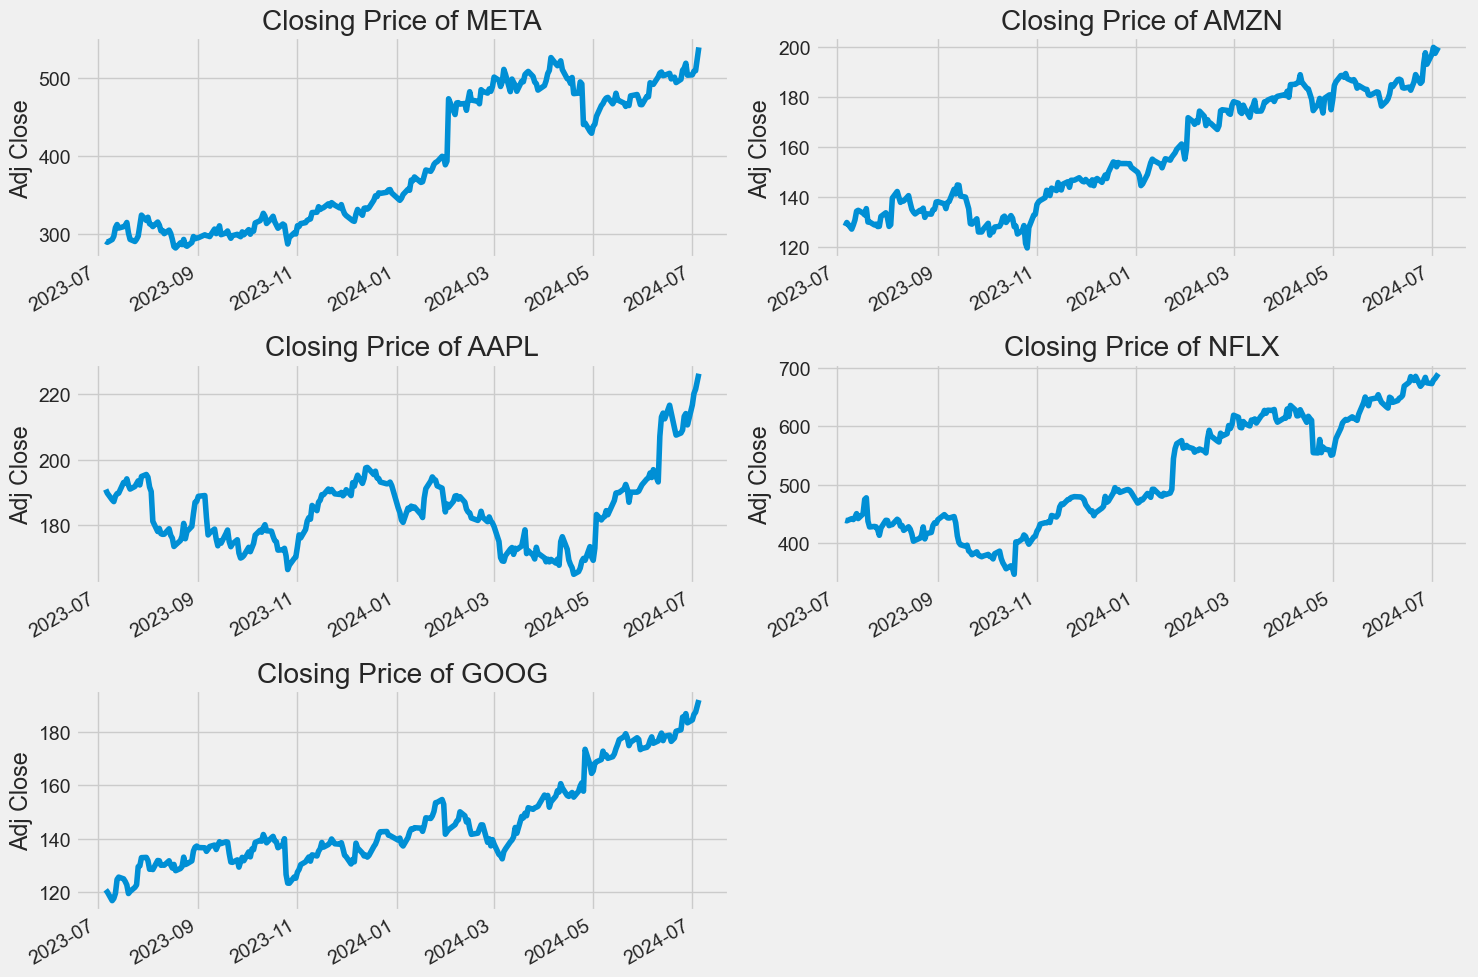

In [12]:
plt.figure(figsize = (15, 10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for  i, company in enumerate(company_list, 1): 
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

#### Volume of Sales

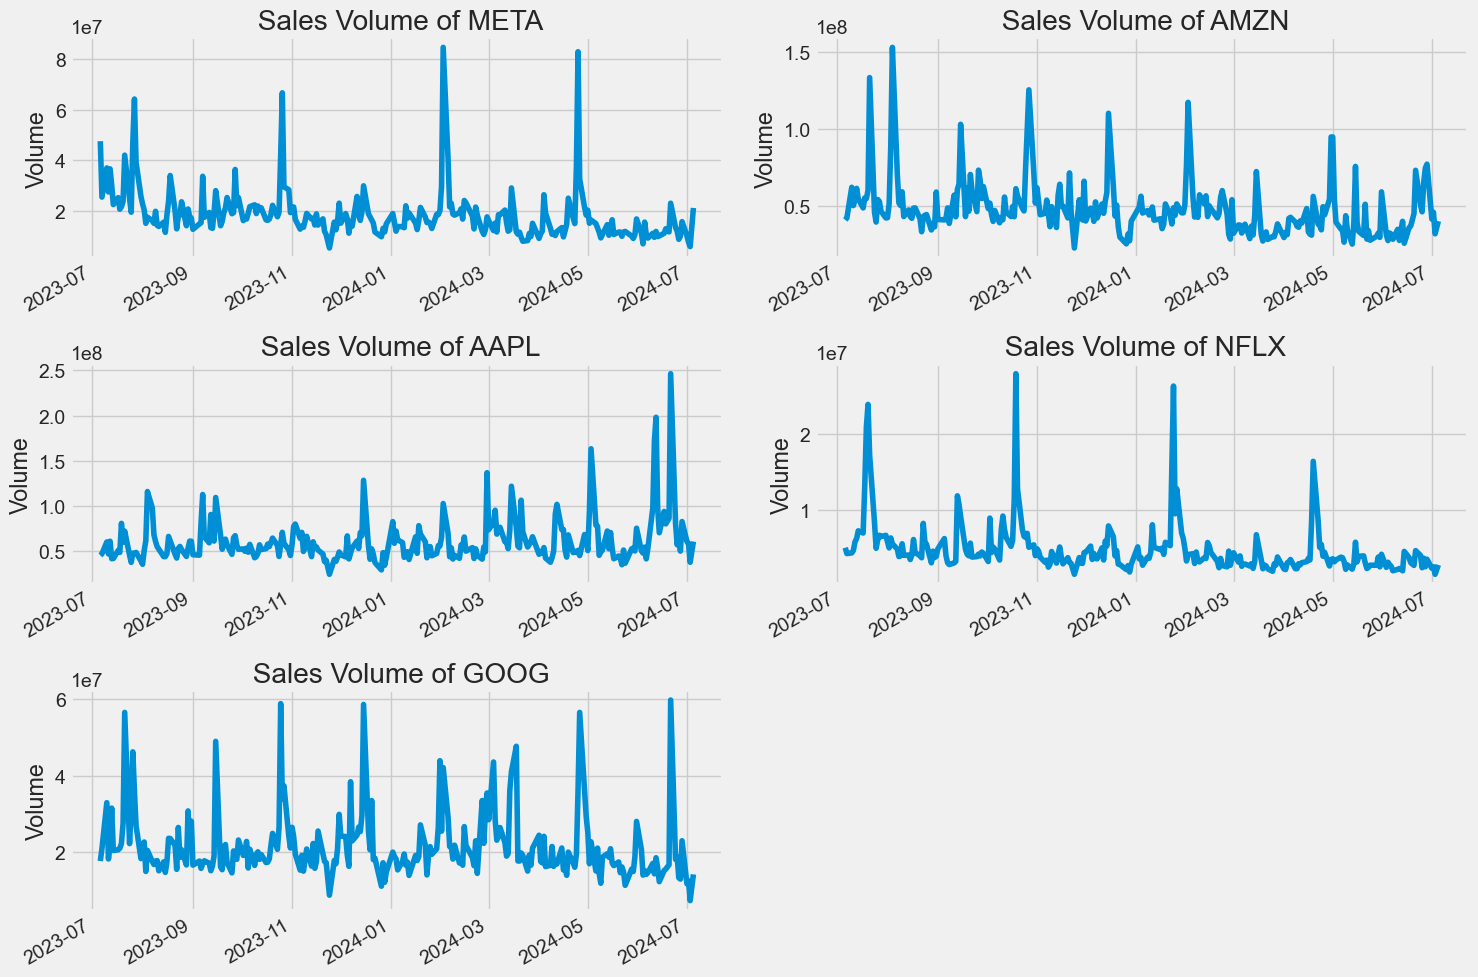

In [13]:

plt.figure(figsize = (15, 10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for  i, company in enumerate(company_list, 1): 
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f" Sales Volume of {tech_list[i - 1]}")
    
plt.tight_layout()

#### Moving average

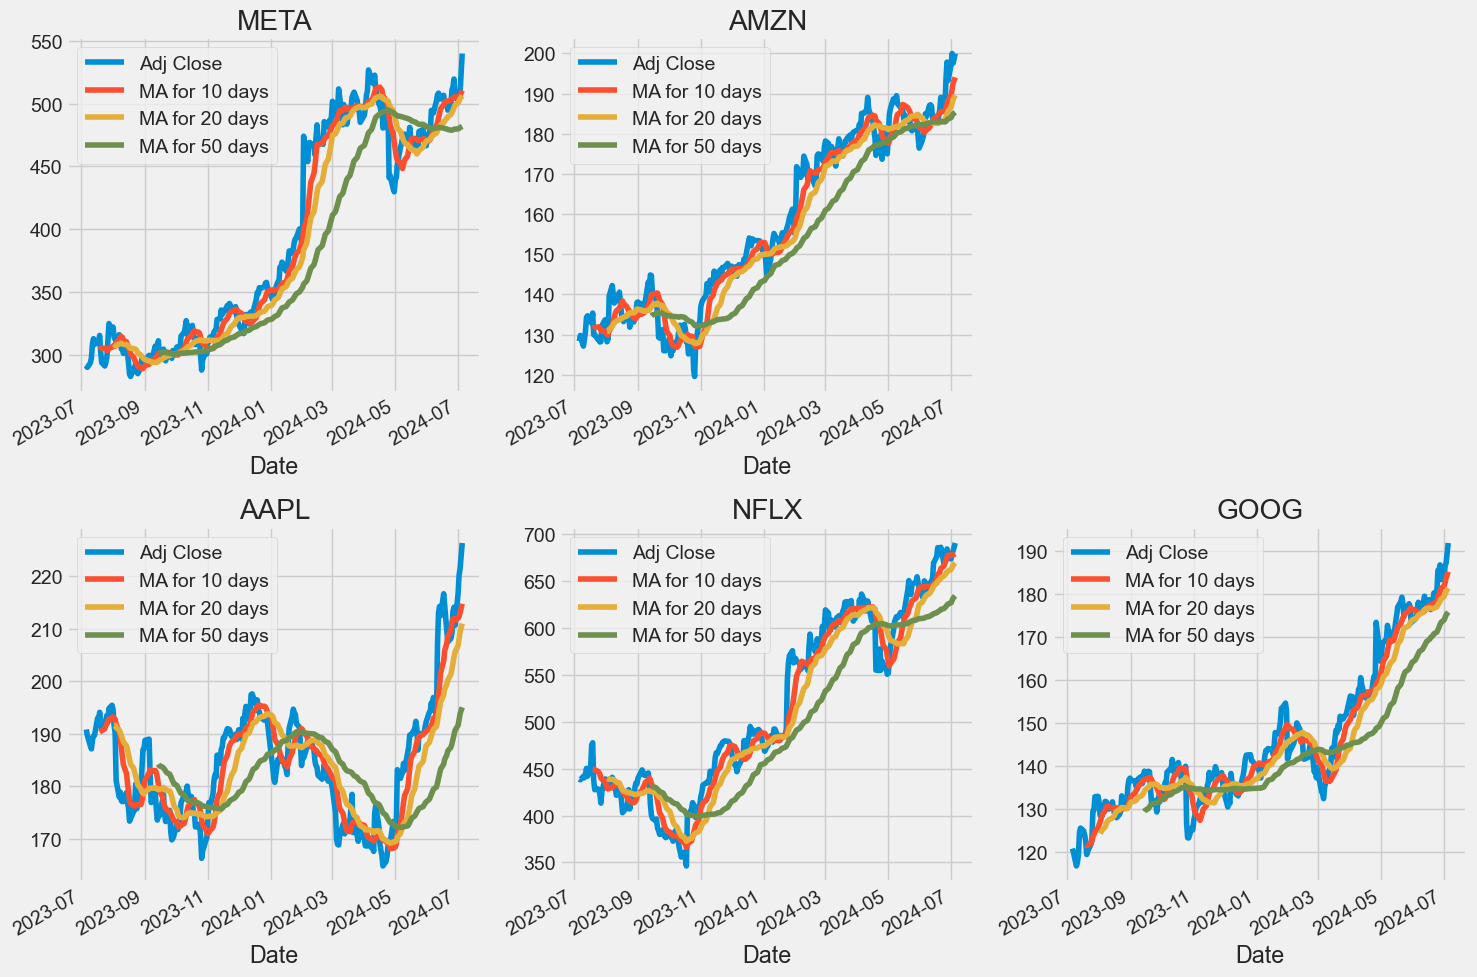

In [14]:
ma_day= [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax = axes[0,0])
axes [0,0].set_title('META') 

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax = axes[0,1])
axes [0,1].set_title('AMZN') 

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax = axes[1,0])
axes [1,0].set_title('AAPL') 

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax = axes[1,1])
axes [1,1].set_title('NFLX') 

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]. plot(ax = axes[1,2])
axes [1,2].set_title('GOOG')

axes[0][2].set_visible(False)

fig.tight_layout()

#### Daily Return on Stock Average

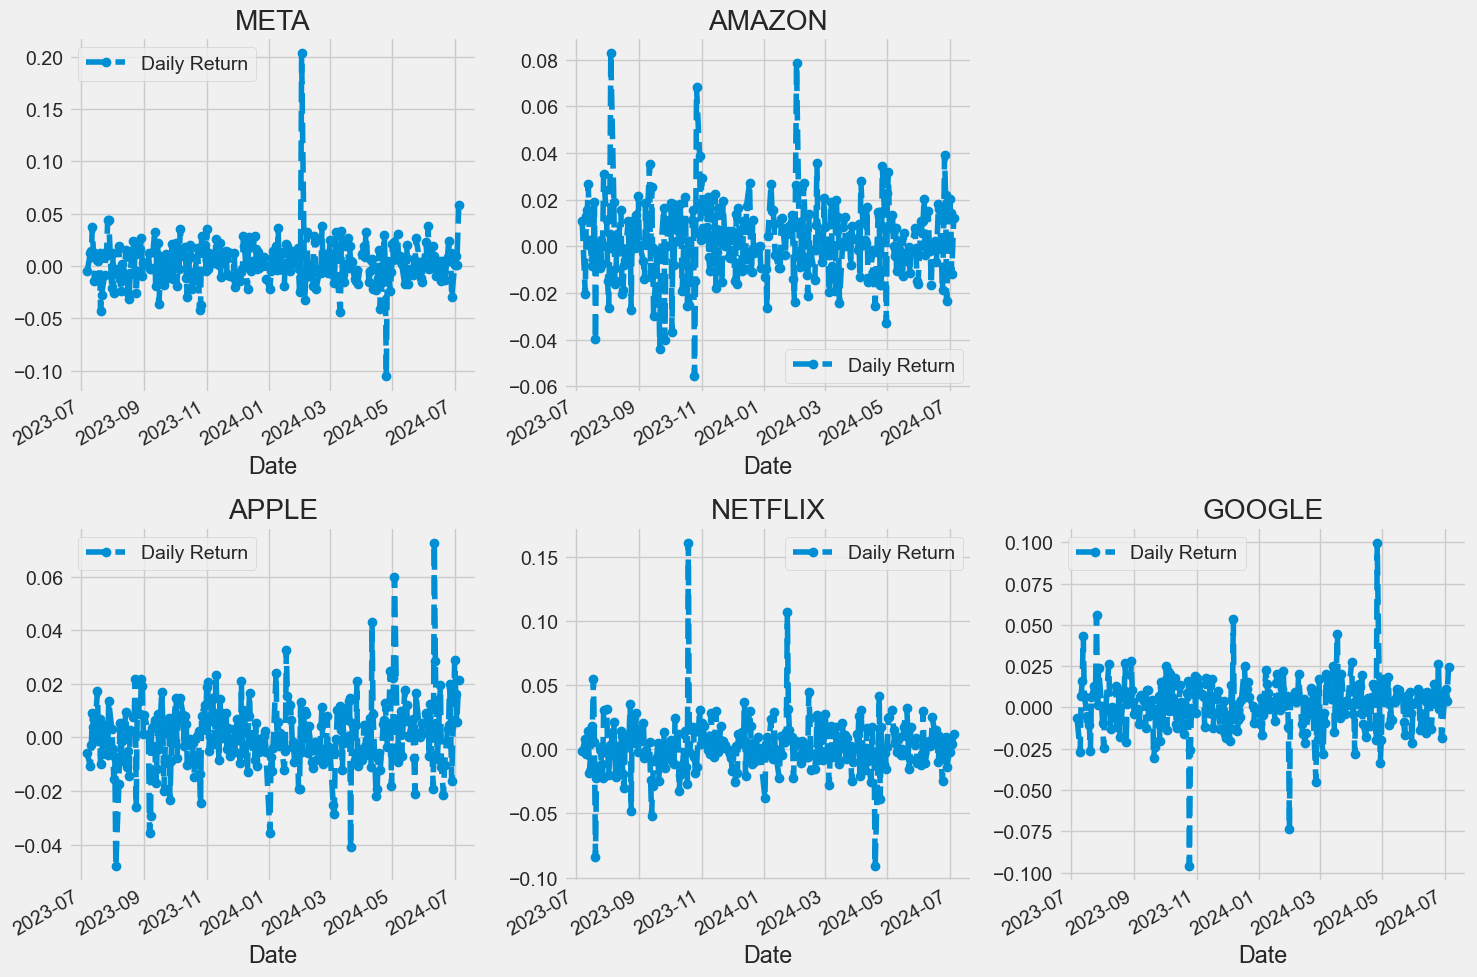

In [15]:
#using pct_change to find the daily percentage change in stock prices 

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
#plotting daily return percentage 

fig, axes = plt.subplots(nrows = 2, ncols = 3)

fig.set_figheight(10)
fig.set_figwidth(15)

META['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('META')

AMZN['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('AMAZON') 

AAPL['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('APPLE')

NFLX['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('NETFLIX')

GOOG['Daily Return'].plot(ax = axes[1,2], legend = True, linestyle = '--', marker = 'o')
axes[1,2].set_title('GOOGLE')

axes[0][2].set_visible(False)

fig.tight_layout()

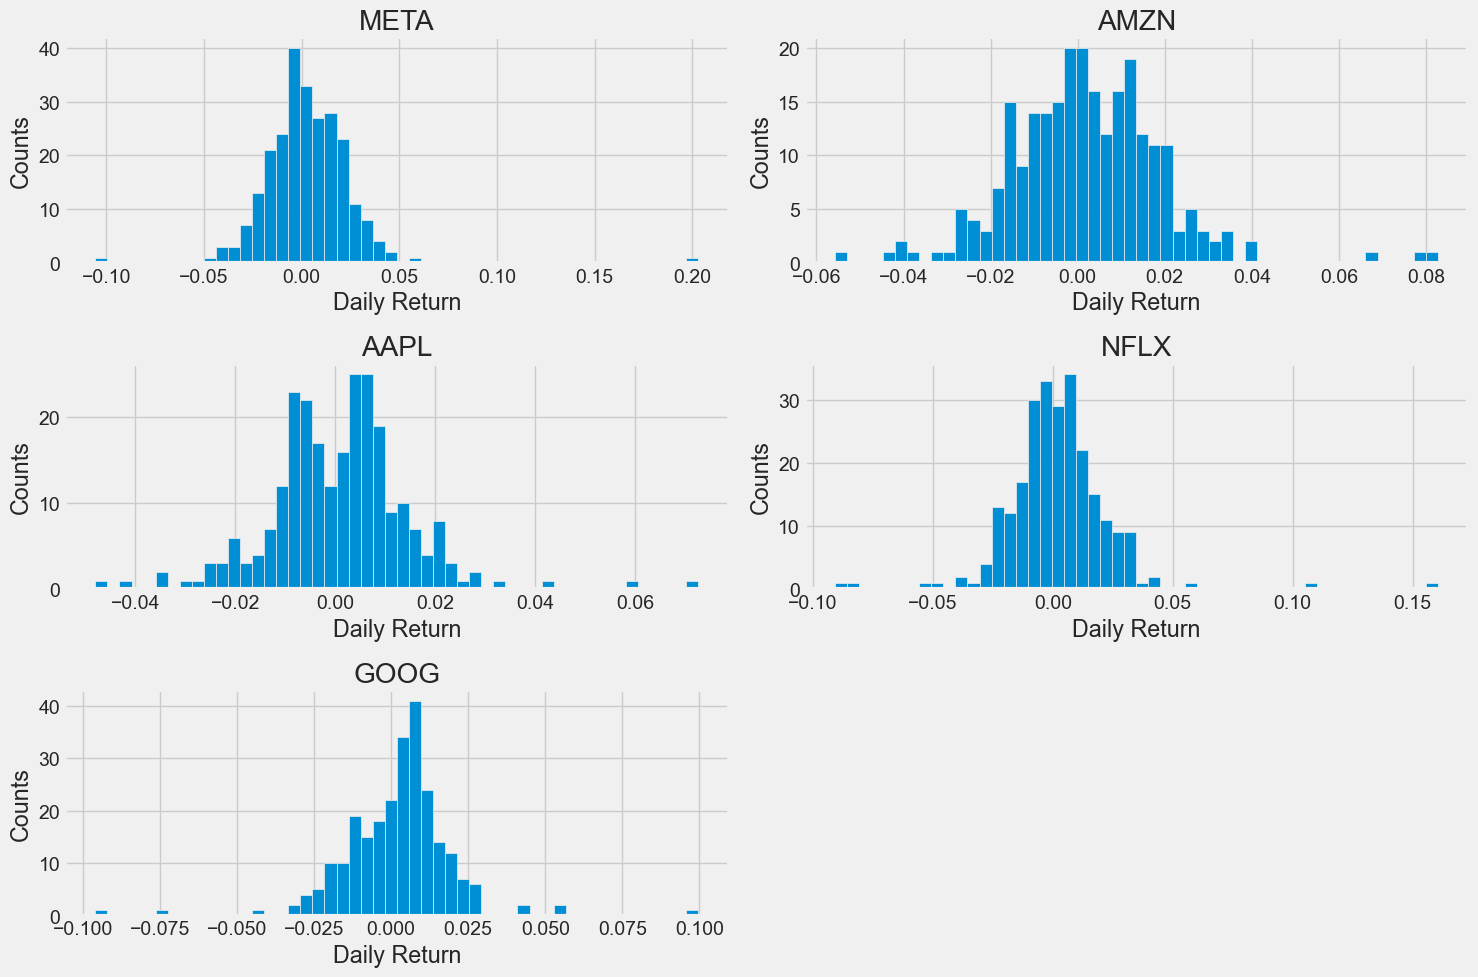

In [16]:
#daily return histogram view

plt.figure(figsize = (15, 10))

for i, company in enumerate (company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#### Correlation between different stock closing prices

In [17]:
#combining the closing prices from tech list in a dataframe 

closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']


#making a new dataframe for tech returns

tech_return = closing_df.pct_change()
tech_return.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2023-07-06,NaN,NaN,NaN,NaN,NaN
2023-07-07,-0.005891,0.011063,-0.006533,-0.005000,-0.001686
2023-07-10,-0.010856,-0.020419,-0.027218,0.012288,0.008240
2023-07-11,-0.002810,0.012979,0.007187,0.014247,-0.003396
2023-07-12,0.008985,0.015686,0.016226,0.037044,0.008723


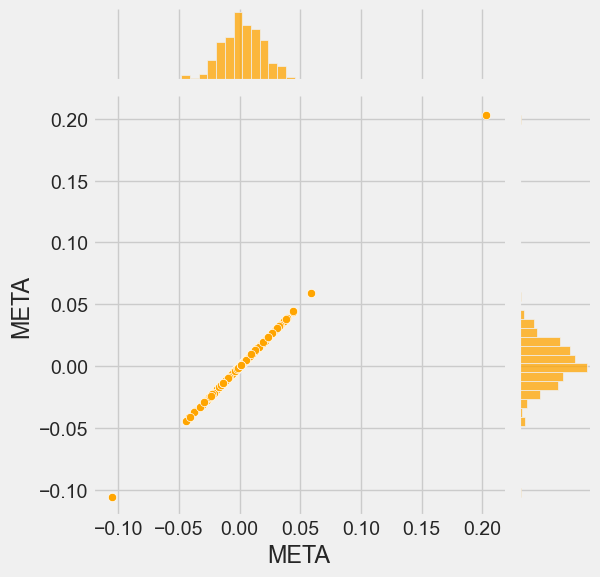

In [18]:
#checking for stocks of META if they are perefectly correlated 

sns.jointplot(x = 'META', y = 'META', data = tech_return, kind = 'scatter', color = 'orange')

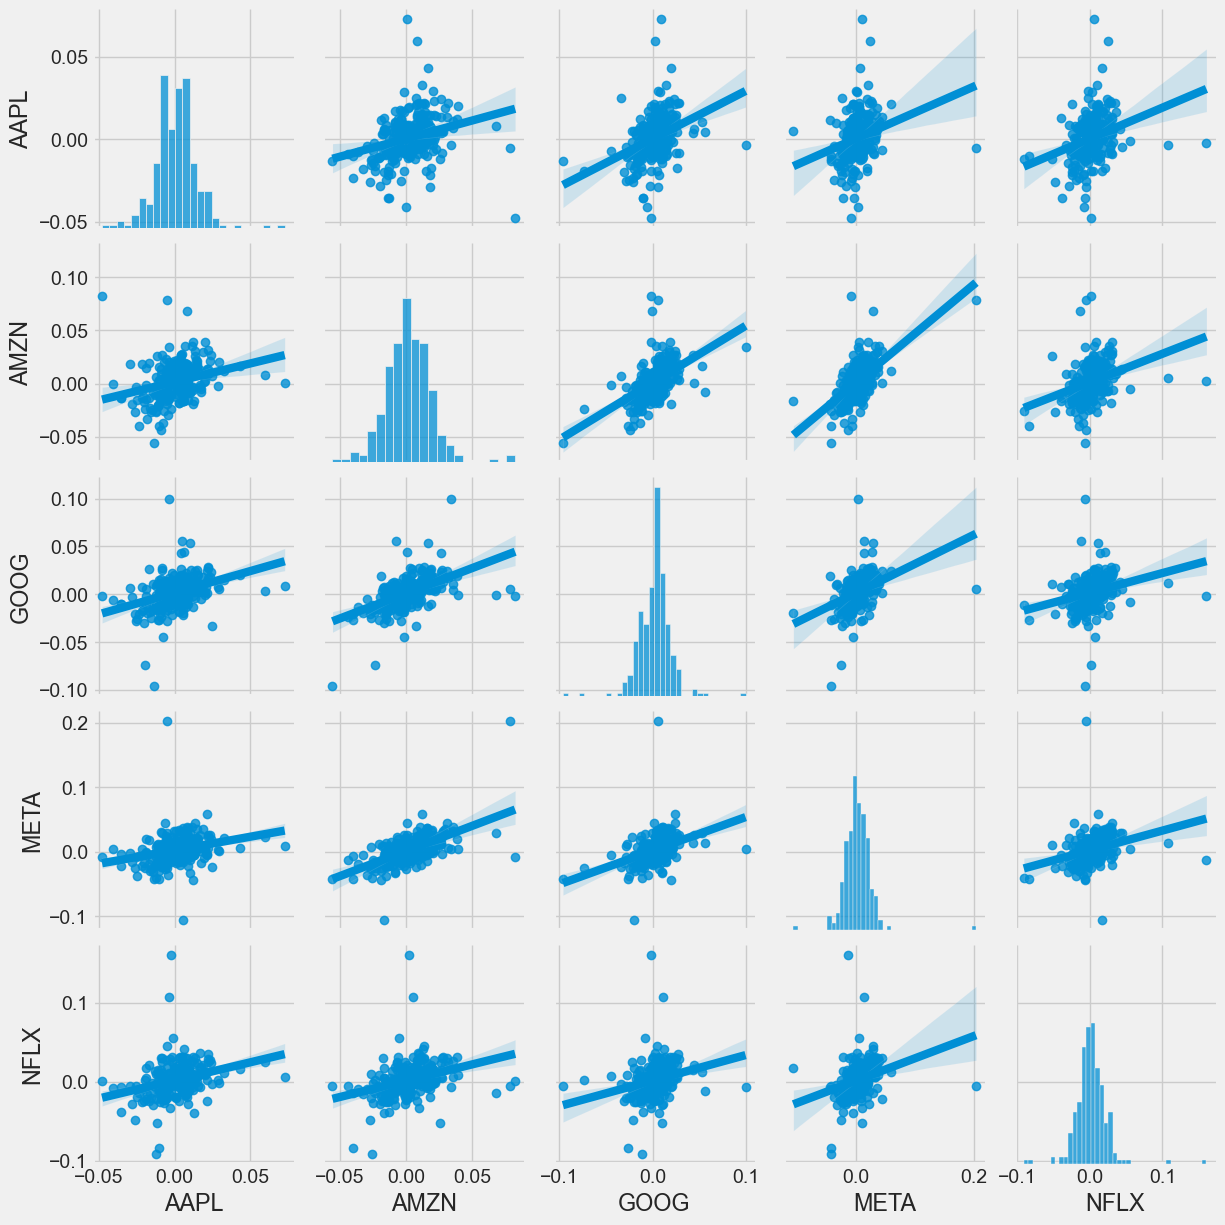

In [19]:
#combining the stocks of FAANG in pairplot()

sns.pairplot(tech_return, kind = 'reg')

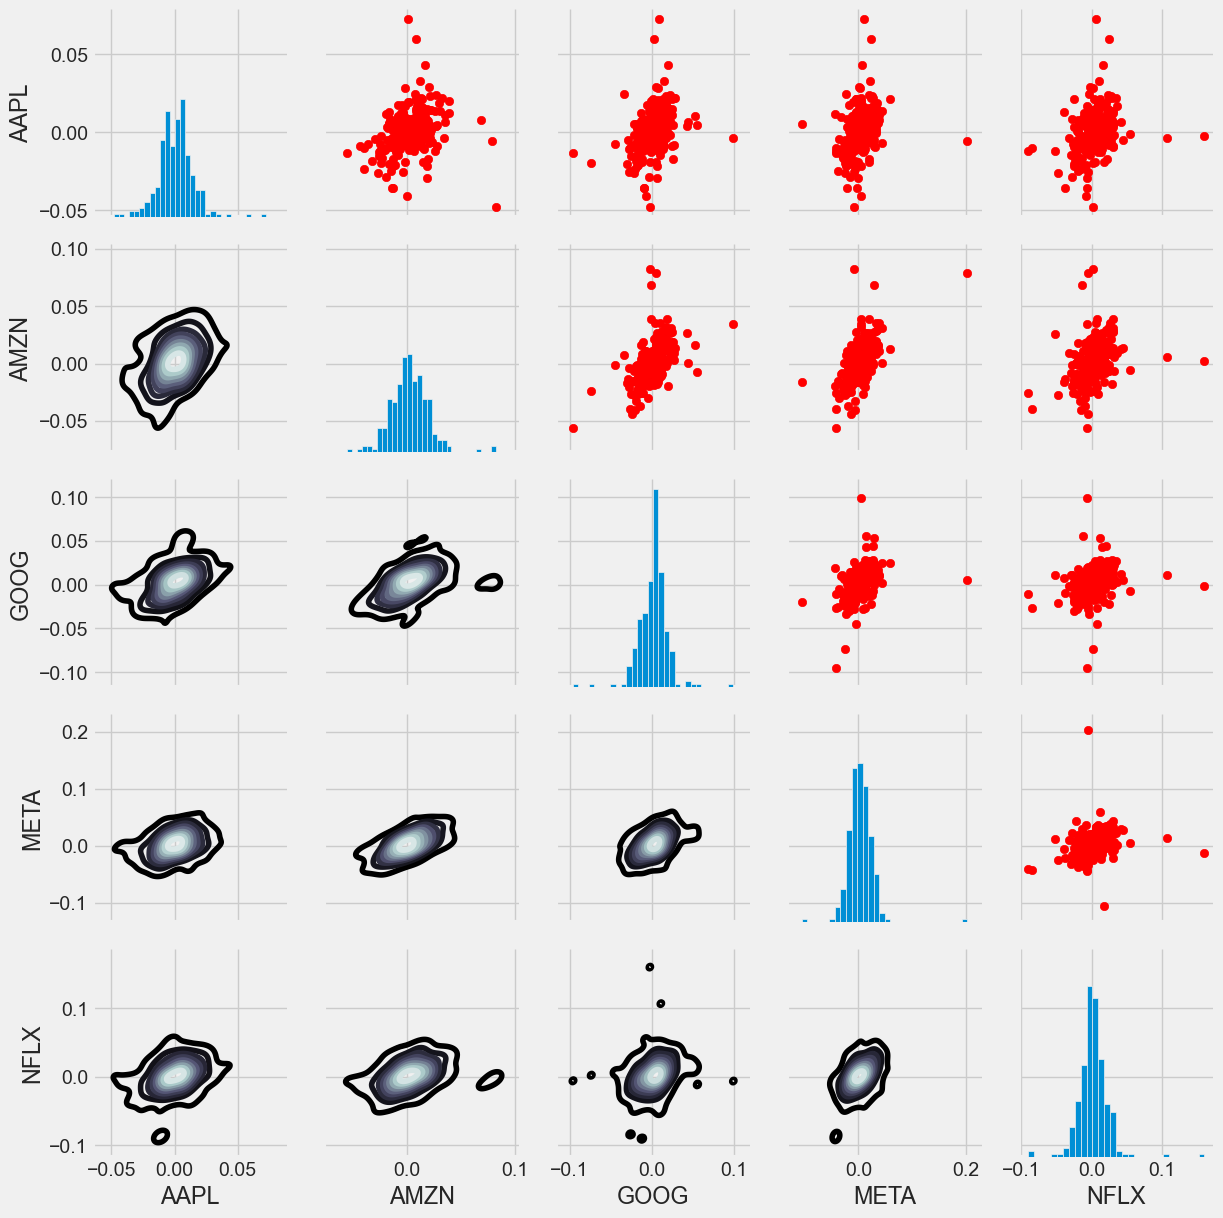

In [20]:
#combining the stocks of FAANG using PairGrid()

#setting up figure by naming it return_fig, call pairplot on the DataFrame 

return_fig = sns.PairGrid(tech_return.dropna())

#using map_upper() we can specify what upper triangle looks like 

return_fig.map_upper(plt.scatter, color = 'red')

#using map_lower() to define the lower triangle including the the (kde) plot type

return_fig.map_lower(sns.kdeplot, cmap = 'bone')

#defining the diagnal as the series of histogram  plot of daily returns 

return_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

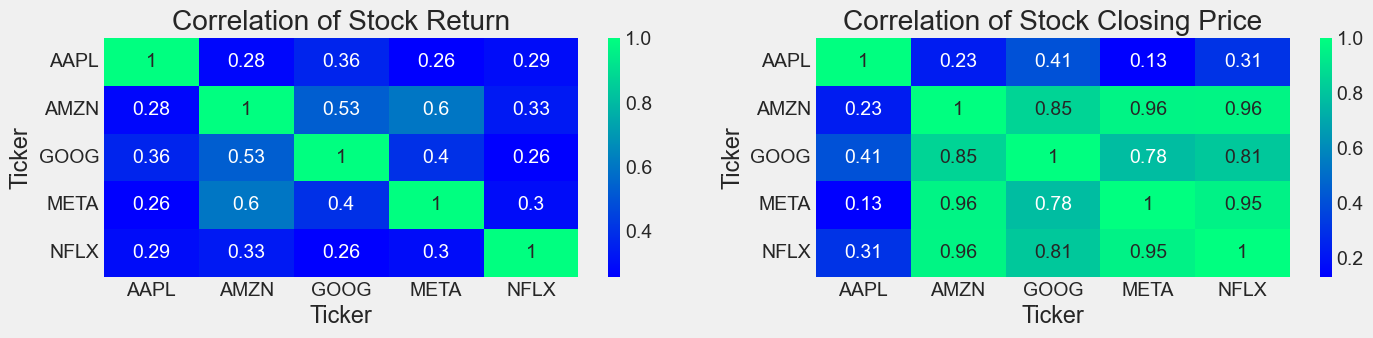

In [21]:
#generating correalation matrix of the stocks closing prices

plt.figure(figsize = (15, 10))

plt.subplot(3, 2, 1)

sns.heatmap(tech_return.corr(), annot = True, cmap = 'winter')
plt.title('Correlation of Stock Return')

plt.subplot(3, 2, 2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'winter')
plt.title('Correlation of Stock Closing Price')

#### How much value do we put at risk by investing in a particular stock?

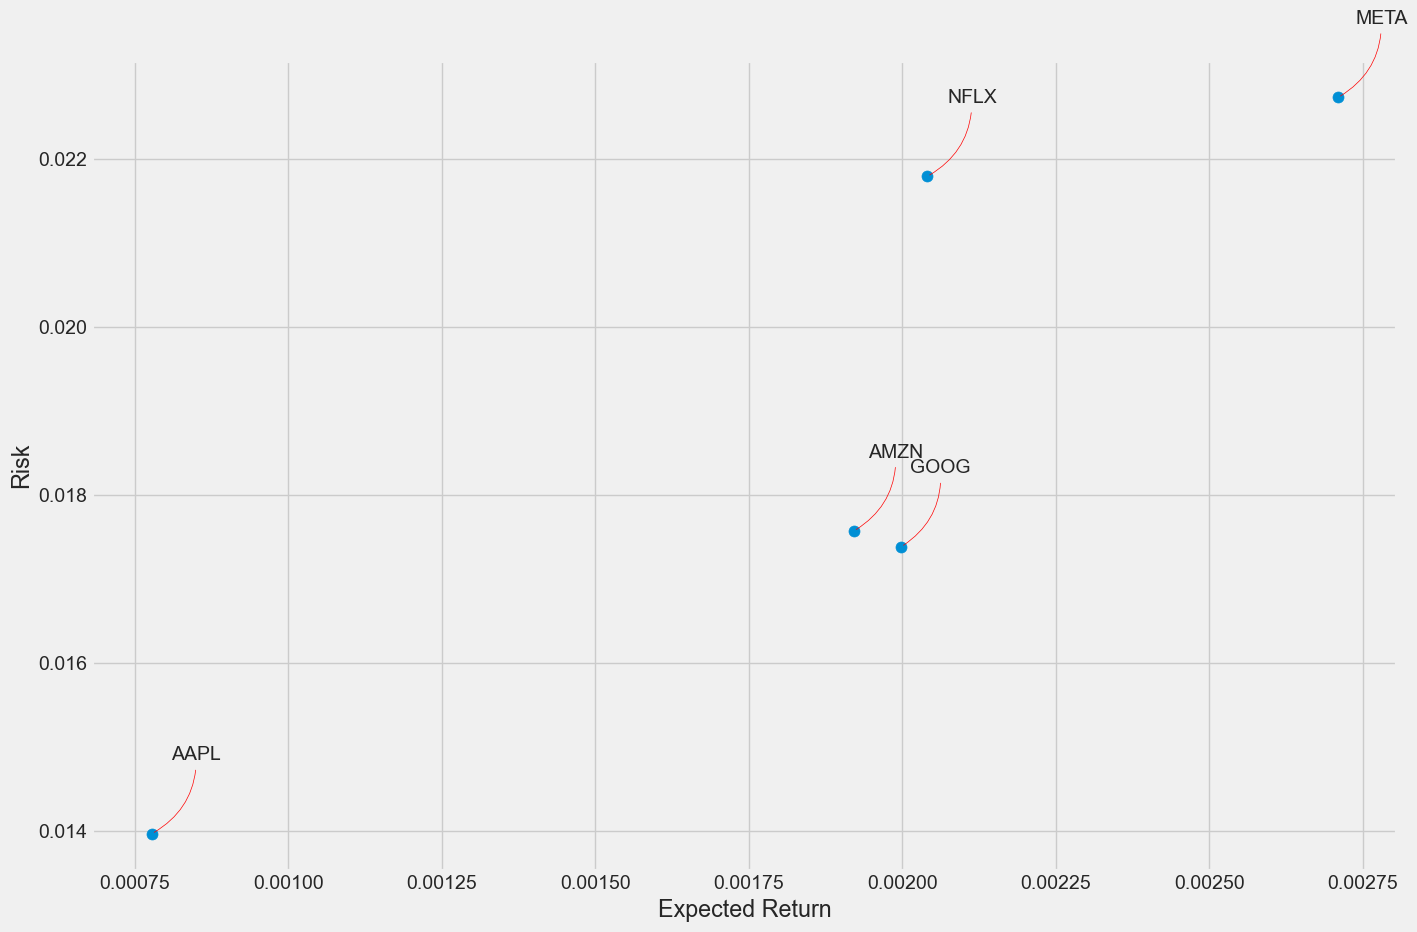

In [22]:
#compare the expected return with the standard deviation of daily returns

ret = tech_return.dropna()

area = np.pi*20 

plt.figure(figsize = (15, 10))
plt.scatter(ret.mean(), ret.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(ret.columns, ret.mean(), ret.std()): 
    plt.annotate(label, xy = (x, y), xytext = (50, 50), textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', color = 'red', connectionstyle = 'arc3, rad = -0.3'))

### Building Models 

#### Predicting the closing price of META inc. 

In [23]:
#get the stock quote (META listing date 18 May 2012)

df = pdr.get_data_yahoo ('META', start = '2012-05-18', end = datetime.now())

#show data 
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


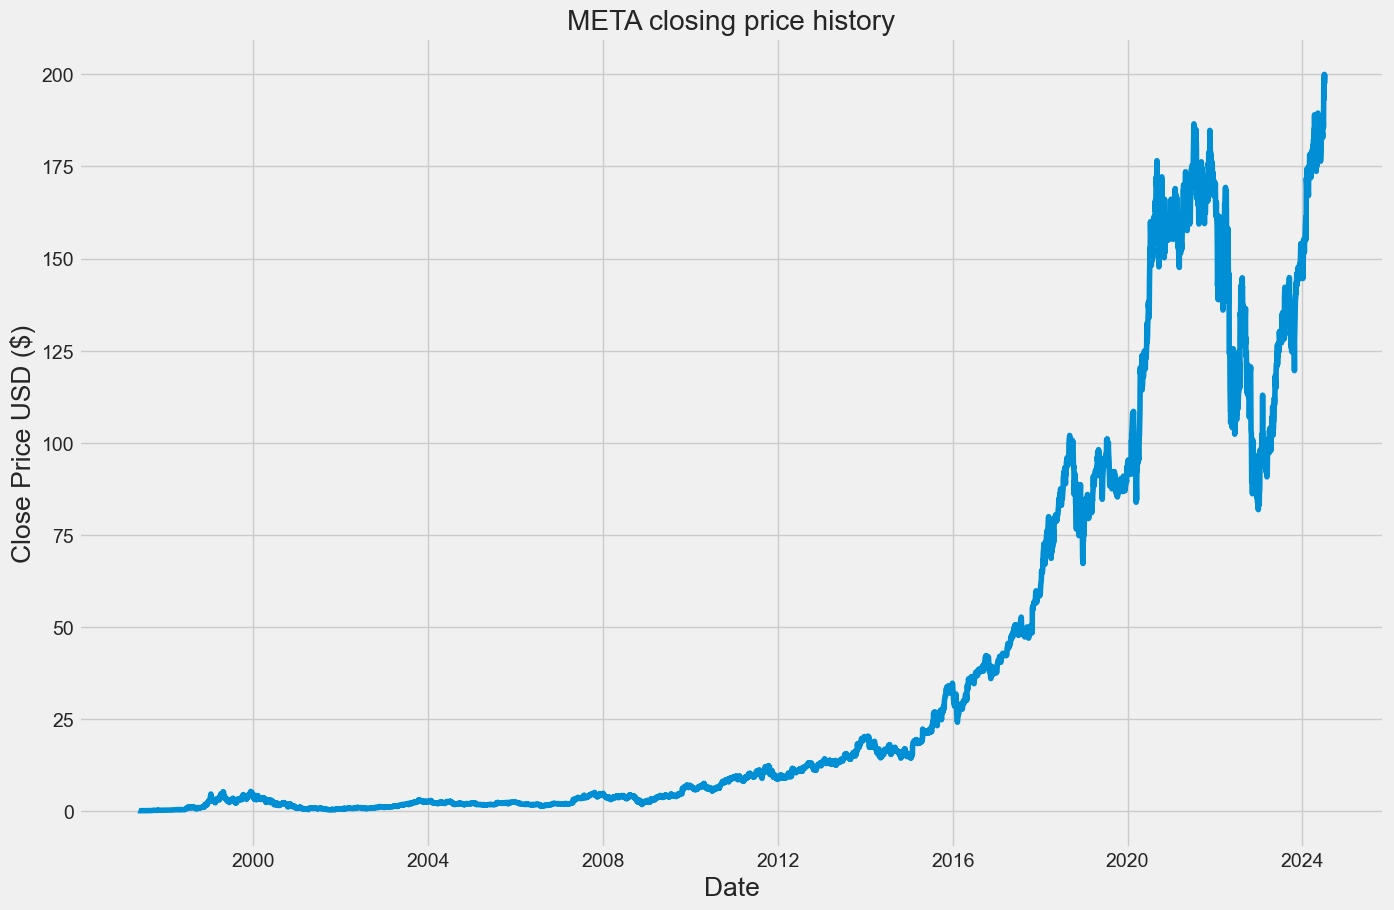

In [42]:
#plotting the closing price history of META

plt.figure(figsize = (15,10))
plt.title("META closing price history")
plt.plot(df['Adj Close']) 
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Close Price USD ($)', fontsize = 19)
plt.show()

In [43]:
#creating a new data frame with only 'Adj Close' column 

data = df.filter(['Adj Close'])

#convert dataframe to numpy array 

dataset = data.values 

#get the number of rows and columns to train the model 

training_data_len = int(np.ceil(len(dataset) *0.95))

training_data_len

6488

In [44]:
#scale the data 

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.40674067e-04],
       [8.33590646e-05],
       [7.81522720e-05],
       ...,
       [1.00000000e+00],
       [9.87945775e-01],
       [1.00000000e+00]])

In [45]:
#create the scaled training dataset 

train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train datasets 

x_train = []
y_train = []

for  i  in range (60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61: 
        print(x_train)
        print(y_train)
        print() 
        
#convert x_train and y_train to numpy datasets 

x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.40674067e-04, 8.33590646e-05, 7.81522720e-05, 5.99159022e-05,
       7.81272293e-06, 0.00000000e+00, 2.60490928e-05, 4.68913558e-05,
       3.38668094e-05, 2.73495239e-05, 2.60490928e-05, 2.86549859e-05,
       2.08372693e-05, 5.20679257e-06, 3.64677088e-05, 6.51277256e-05,
       7.29404486e-05, 4.68913558e-05, 3.64677088e-05, 5.20981856e-05,
       4.68913558e-05, 4.42854254e-05, 2.73495239e-05, 2.86549859e-05,
       2.86549859e-05, 3.25613474e-05, 2.60490928e-05, 2.86549859e-05,
       2.86549859e-05, 2.86549859e-05, 2.34431624e-05, 3.64677088e-05,
       2.99554543e-05, 4.81917869e-05, 1.28949989e-04, 1.51092721e-04,
       2.26639062e-04, 2.31850886e-04, 2.91766788e-04, 2.24033169e-04,
       1.84959530e-04, 2.60505909e-04, 2.34456816e-04, 2.05801793e-04,
       1.90171353e-04, 1.96683608e-04, 1.84959530e-04, 2.24033169e-04,
       2.16220446e-04, 2.08402730e-04, 2.31850886e-04, 2.70924525e-04,
       2.63111802e-04, 2.50087256e-04, 2.55294085e-04, 2.29244993e-04,
     

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model 

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

C:\Users\Tushar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6428/6428 ━━━━━━━━━━━━━━━━━━━━ 122s 19ms/step - loss: 0.0012


In [47]:
#creating the test dataset 

test_data = scaled_data[training_data_len - 60: , :]

#creating the x_test and y_test datasets 

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#convert the data to numpy array 

x_test = np.array(x_test)

#reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean square error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


3.441885274719505

C:\Users\Tushar\AppData\Local\Temp\ipykernel_14532\1279182370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


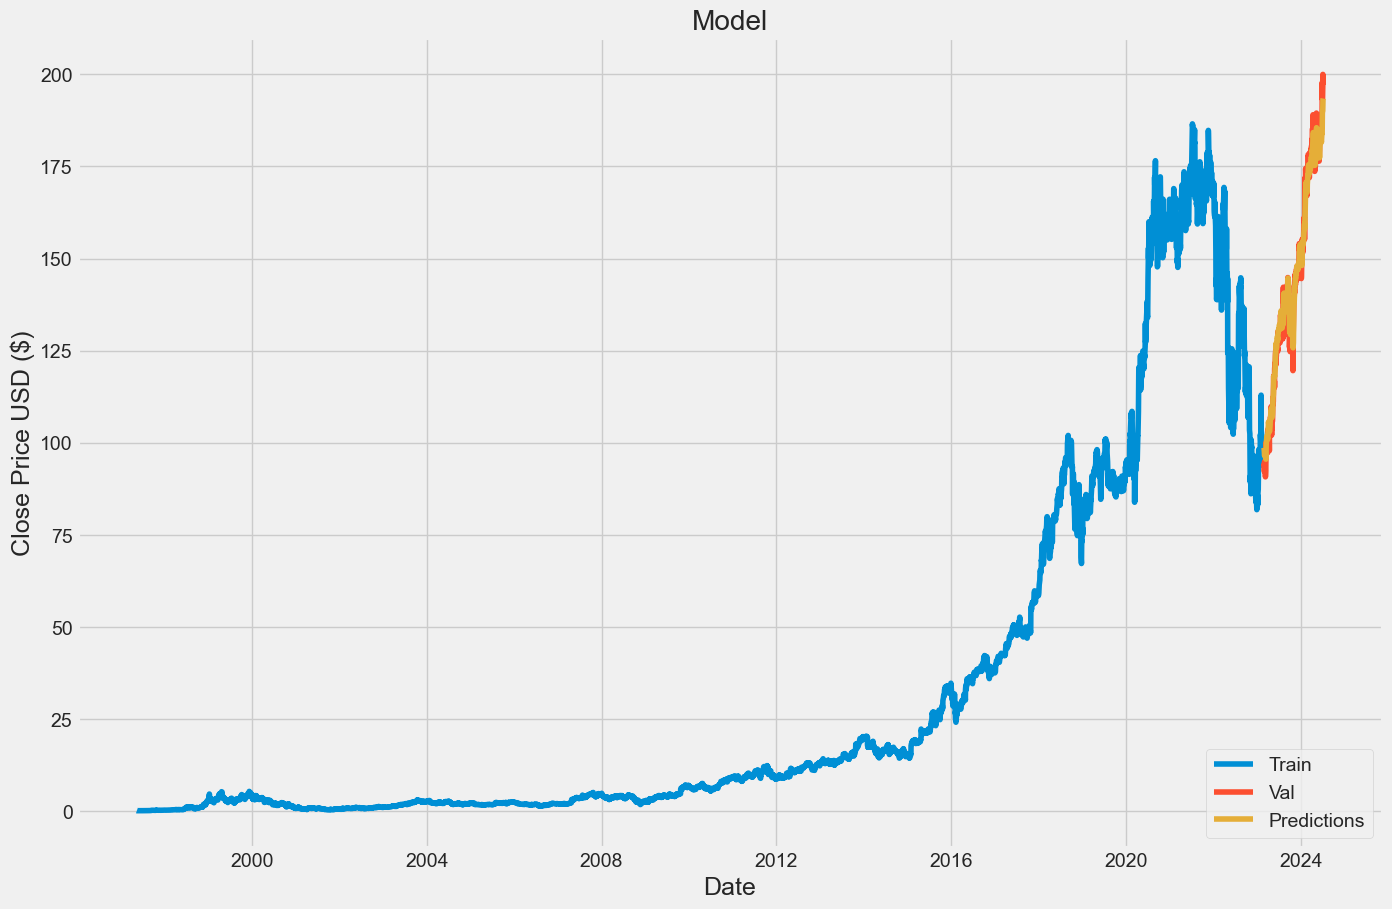

In [48]:
#plot the data 

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions


#visualise the data
plt.figure(figsize = (15,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [49]:
#show the valid and predicted values 

valid

,Adj Close,Predictions
Date,,
2023-02-27,93.760002,98.598068
2023-02-28,94.230003,98.004959
2023-03-01,92.169998,97.834877
2023-03-02,92.129997,97.072731
2023-03-03,94.900002,96.463104
...,...,...
2024-06-28,193.250000,189.626053
2024-07-01,197.199997,190.107361
2024-07-02,200.000000,191.360001


#### Predicting the closing price of APPLE inc: 

In [24]:
#get the stock quote (AAPl listing date 12 Dec. 1980)

df = pdr.get_data_yahoo ('AAPL', start = '1980-12-12', end = datetime.now())

#show data 
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


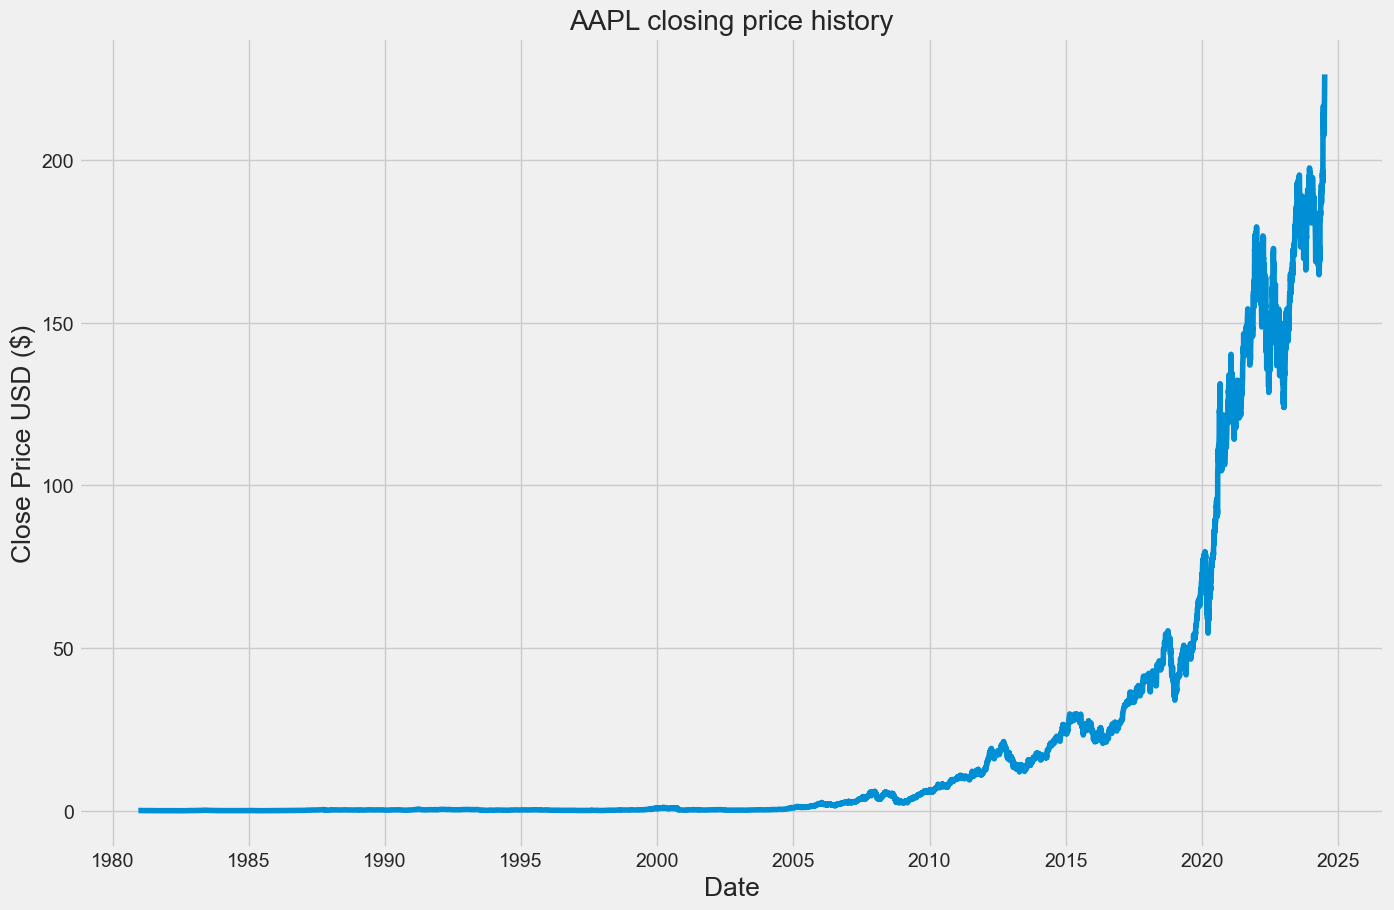

In [25]:
#plotting the closing price history of AAPL

plt.figure(figsize = (15,10))
plt.title("AAPL closing price history")
plt.plot(df['Adj Close']) 
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Close Price USD ($)', fontsize = 19)
plt.show()

In [26]:
#creating a new data frame with only 'Adj Close' column 

data = df.filter(['Adj Close'])

#convert dataframe to numpy array 

dataset = data.values 

#get the number of rows and columns to train the model 

training_data_len = int(np.ceil(len(dataset) *0.95))

training_data_len

10432

In [27]:
#scale the data 

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.70246879e-04],
       [2.47410551e-04],
       [2.16958700e-04],
       ...,
       [9.73177482e-01],
       [9.78833633e-01],
       [1.00000000e+00]])

In [28]:
#create the scaled training dataset 

train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train datasets 

x_train = []
y_train = []

for  i  in range (60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61: 
        print(x_train)
        print(y_train)
        print() 
        
#convert x_train and y_train to numpy datasets 

x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00027025, 0.00024741, 0.00021696, 0.00022647, 0.0002379 ,
       0.00026263, 0.00028357, 0.0003026 , 0.00032734, 0.00037302,
       0.00038063, 0.00036731, 0.00035208, 0.00035779, 0.00034637,
       0.00032354, 0.0003026 , 0.00029309, 0.00031783, 0.00031402,
       0.00029689, 0.0002988 , 0.00030831, 0.0003045 , 0.00033305,
       0.00031783, 0.00032734, 0.00033305, 0.00033115, 0.00032354,
       0.00031973, 0.0003045 , 0.00028738, 0.00026263, 0.0002379 ,
       0.00025312, 0.00026834, 0.00026834, 0.00027025, 0.00024741,
       0.00024741, 0.00023409, 0.00023028, 0.00022076, 0.00023028,
       0.00024741, 0.00022267, 0.00020173, 0.00020744, 0.00019412,
       0.00021696, 0.00022267, 0.00023599, 0.0002379 , 0.00023219,
       0.00022838, 0.00022647, 0.00022267, 0.00019222, 0.00017509])]
[0.00016176756201895692]

[array([0.00027025, 0.00024741, 0.00021696, 0.00022647, 0.0002379 ,
       0.00026263, 0.00028357, 0.0003026 , 0.00032734, 0.00037302,
       0.00038063, 0.00036731, 0

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model 

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

C:\Users\Tushar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10372/10372 ━━━━━━━━━━━━━━━━━━━━ 168s 16ms/step - loss: 8.9161e-04


In [30]:
#creating the test dataset 

test_data = scaled_data[training_data_len - 60: , :]

#creating the x_test and y_test datasets 

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#convert the data to numpy array 

x_test = np.array(x_test)

#reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean square error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


14.129030150647095

C:\Users\Tushar\AppData\Local\Temp\ipykernel_14532\1279182370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


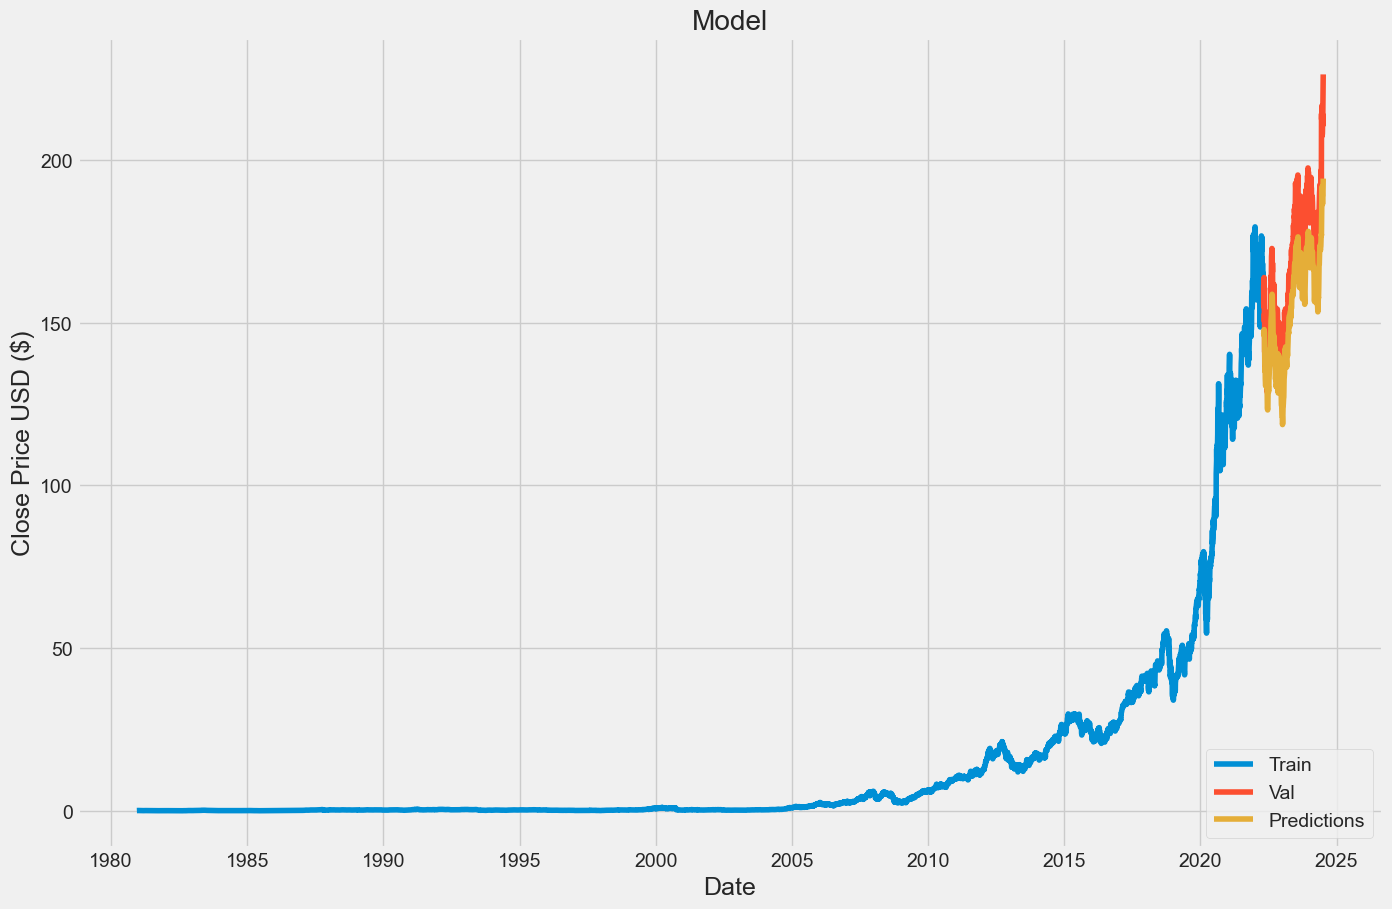

In [31]:
#plot the data 

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions


#visualise the data
plt.figure(figsize = (15,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [32]:
#show the valid and predicted values 

valid

,Adj Close,Predictions
Date,,
2022-04-28,161.571945,146.460968
2022-04-29,155.657608,146.666367
2022-05-02,155.963730,146.428513
2022-05-03,157.464523,146.120239
2022-05-04,163.921860,146.203796
...,...,...
2024-06-28,210.619995,188.631592
2024-07-01,216.750000,189.135635
2024-07-02,220.270004,190.419067


#### Predicting the closing price of AMAZON.com, inc. 

In [33]:
#get the stock quote (AMZN listing date 15 May 1997)

df = pdr.get_data_yahoo ('AMZN', start = '1997-05-15', end = datetime.now())

#show data 
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


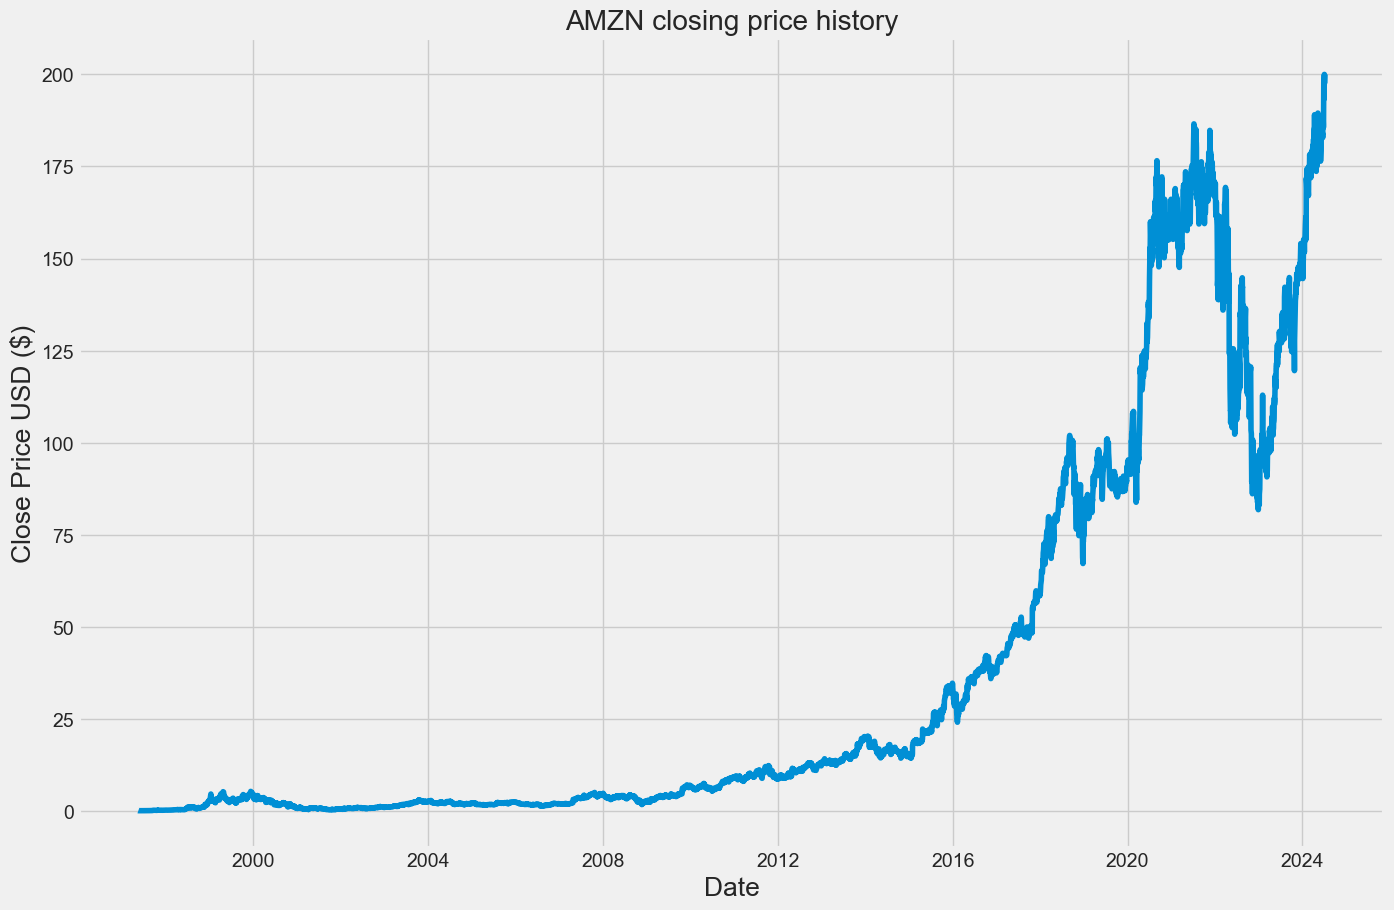

In [34]:
#plotting the closing price history of AMZN

plt.figure(figsize = (15,10))
plt.title("AMZN closing price history")
plt.plot(df['Adj Close']) 
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Close Price USD ($)', fontsize = 19)
plt.show()

In [35]:
#creating a new data frame with only 'Adj Close' column 

data = df.filter(['Adj Close'])

#convert dataframe to numpy array 

dataset = data.values 

#get the number of rows and columns to train the model 

training_data_len = int(np.ceil(len(dataset) *0.95))

training_data_len

6488

In [36]:
#scale the data 

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.40674067e-04],
       [8.33590646e-05],
       [7.81522720e-05],
       ...,
       [1.00000000e+00],
       [9.87945775e-01],
       [1.00000000e+00]])

In [37]:
#create the scaled training dataset 

train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train datasets 

x_train = []
y_train = []

for  i  in range (60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61: 
        print(x_train)
        print(y_train)
        print() 
        
#convert x_train and y_train to numpy datasets 

x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.40674067e-04, 8.33590646e-05, 7.81522720e-05, 5.99159022e-05,
       7.81272293e-06, 0.00000000e+00, 2.60490928e-05, 4.68913558e-05,
       3.38668094e-05, 2.73495239e-05, 2.60490928e-05, 2.86549859e-05,
       2.08372693e-05, 5.20679257e-06, 3.64677088e-05, 6.51277256e-05,
       7.29404486e-05, 4.68913558e-05, 3.64677088e-05, 5.20981856e-05,
       4.68913558e-05, 4.42854254e-05, 2.73495239e-05, 2.86549859e-05,
       2.86549859e-05, 3.25613474e-05, 2.60490928e-05, 2.86549859e-05,
       2.86549859e-05, 2.86549859e-05, 2.34431624e-05, 3.64677088e-05,
       2.99554543e-05, 4.81917869e-05, 1.28949989e-04, 1.51092721e-04,
       2.26639062e-04, 2.31850886e-04, 2.91766788e-04, 2.24033169e-04,
       1.84959530e-04, 2.60505909e-04, 2.34456816e-04, 2.05801793e-04,
       1.90171353e-04, 1.96683608e-04, 1.84959530e-04, 2.24033169e-04,
       2.16220446e-04, 2.08402730e-04, 2.31850886e-04, 2.70924525e-04,
       2.63111802e-04, 2.50087256e-04, 2.55294085e-04, 2.29244993e-04,
     

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model 

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

C:\Users\Tushar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6428/6428 ━━━━━━━━━━━━━━━━━━━━ 118s 18ms/step - loss: 0.0018


In [39]:
#creating the test dataset 

test_data = scaled_data[training_data_len - 60: , :]

#creating the x_test and y_test datasets 

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#convert the data to numpy array 

x_test = np.array(x_test)

#reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean square error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


4.873522269949758

C:\Users\Tushar\AppData\Local\Temp\ipykernel_14532\1279182370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


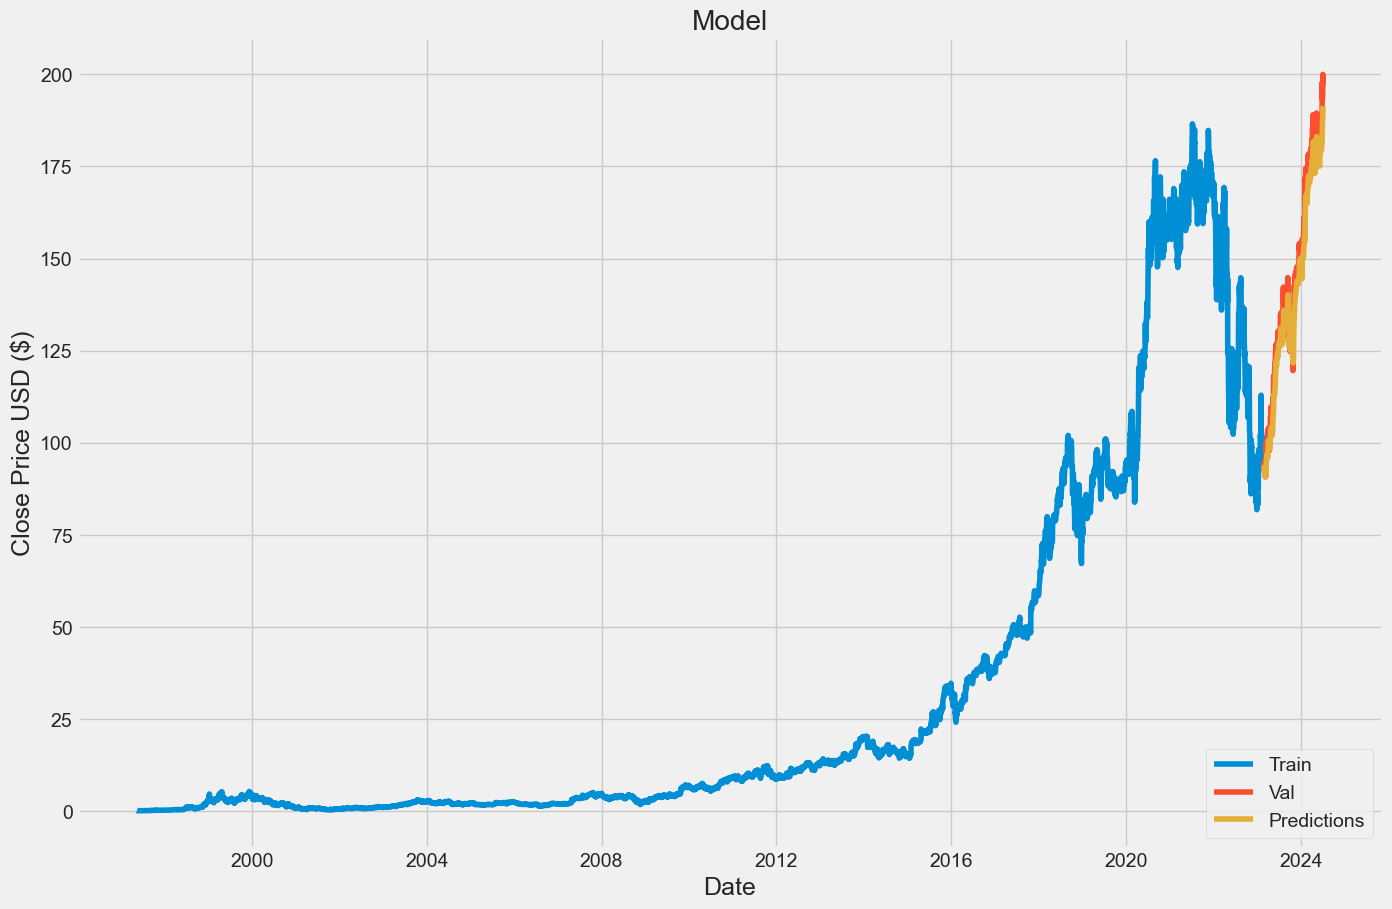

In [40]:
#plot the data 

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions


#visualise the data
plt.figure(figsize = (15,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [41]:
#show the valid and predicted values 

valid

,Adj Close,Predictions
Date,,
2023-02-27,93.760002,93.909882
2023-02-28,94.230003,93.311623
2023-03-01,92.169998,93.072701
2023-03-02,92.129997,92.416862
2023-03-03,94.900002,91.813049
...,...,...
2024-06-28,193.250000,186.956573
2024-07-01,197.199997,187.912857
2024-07-02,200.000000,189.179733


#### 

#### Predicting the closing price of NETFLIX

In [50]:
#get the stock quote (NFLX listing date 23 May 2002)

df = pdr.get_data_yahoo ('NFLX', start = '2002-05-23', end = datetime.now())

#show data 
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


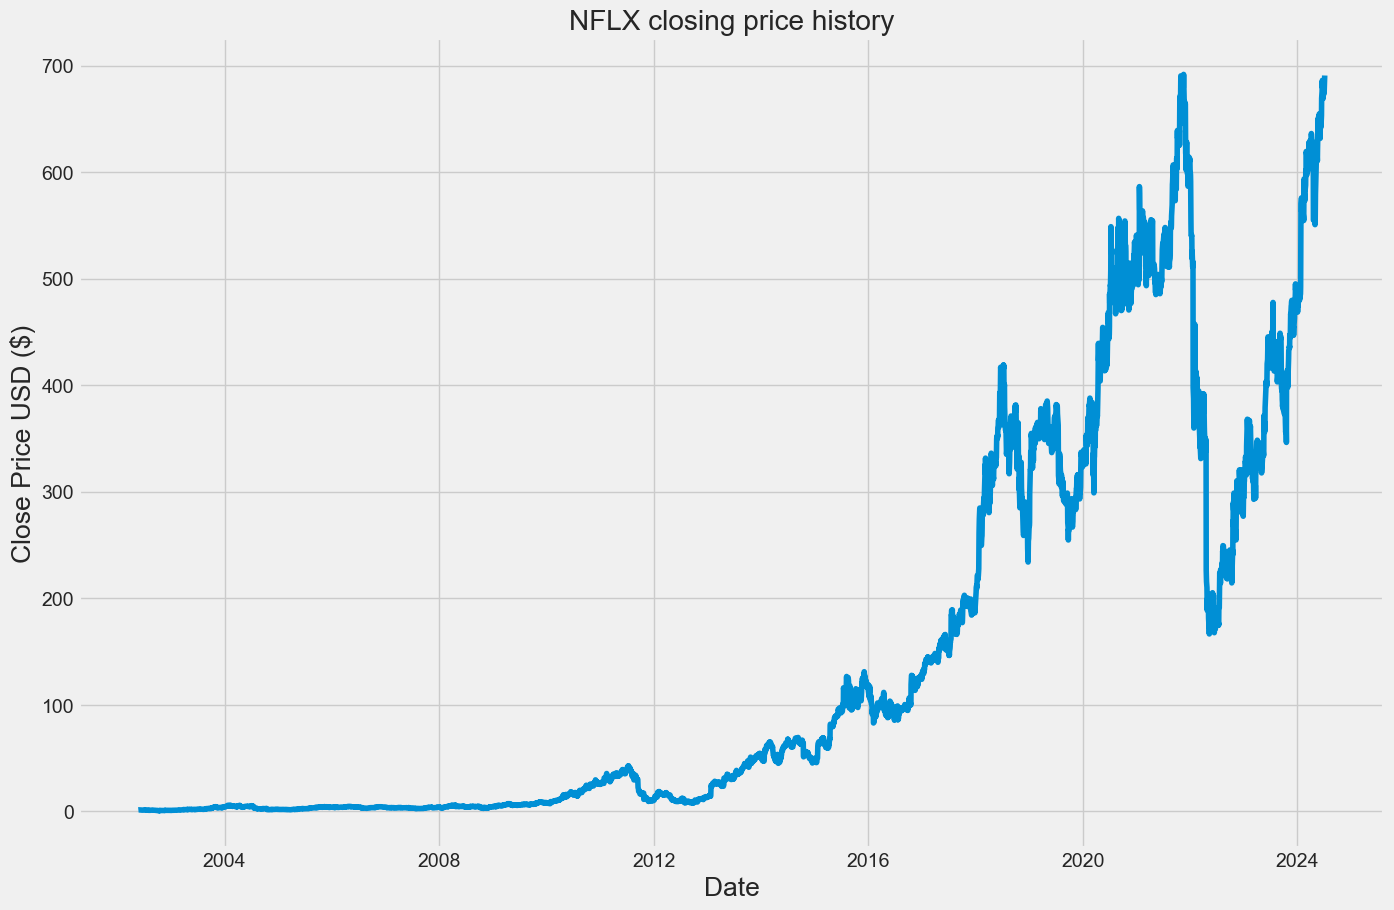

In [51]:
#plotting the closing price history of NFLX

plt.figure(figsize = (15,10))
plt.title("NFLX closing price history")
plt.plot(df['Adj Close']) 
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Close Price USD ($)', fontsize = 19)
plt.show()

In [52]:
#creating a new data frame with only 'Adj Close' column 

data = df.filter(['Adj Close'])

#convert dataframe to numpy array 

dataset = data.values 

#get the number of rows and columns to train the model 

training_data_len = int(np.ceil(len(dataset) *0.95))

training_data_len

5289

In [53]:
#scale the data 

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.98248274],
       [0.98672101],
       [0.99849566]])

In [54]:
#create the scaled training dataset 

train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train datasets 

x_train = []
y_train = []

for  i  in range (60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61: 
        print(x_train)
        print(y_train)
        print() 
        
#convert x_train and y_train to numpy datasets 

x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.00085551, 0.00089064, 0.00082555,
       0.00090614, 0.00094747, 0.00115721, 0.00121714, 0.00130703,
       0.00116134, 0.00113965, 0.00114378, 0.0012967 , 0.00120784,
       0.00111382, 0.00109005, 0.00103632, 0.00112312, 0.00113861,
       0.00115411, 0.00111898, 0.00107249, 0.00095987, 0.00072119,
       0.00072842, 0.00078318, 0.00084001, 0.00075012, 0.00058584,
       0.00058171, 0.00056104, 0.00060857, 0.0006127 , 0.00059927,
       0.00055588, 0.00057861, 0.00066643, 0.00073772, 0.00078112])]
[0.0008813407630413681]

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model 

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

C:\Users\Tushar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5229/5229 ━━━━━━━━━━━━━━━━━━━━ 85s 16ms/step - loss: 0.0021


In [56]:
#creating the test dataset 

test_data = scaled_data[training_data_len - 60: , :]

#creating the x_test and y_test datasets 

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#convert the data to numpy array 

x_test = np.array(x_test)

#reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean square error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


50.54929362908887

C:\Users\Tushar\AppData\Local\Temp\ipykernel_14532\1279182370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


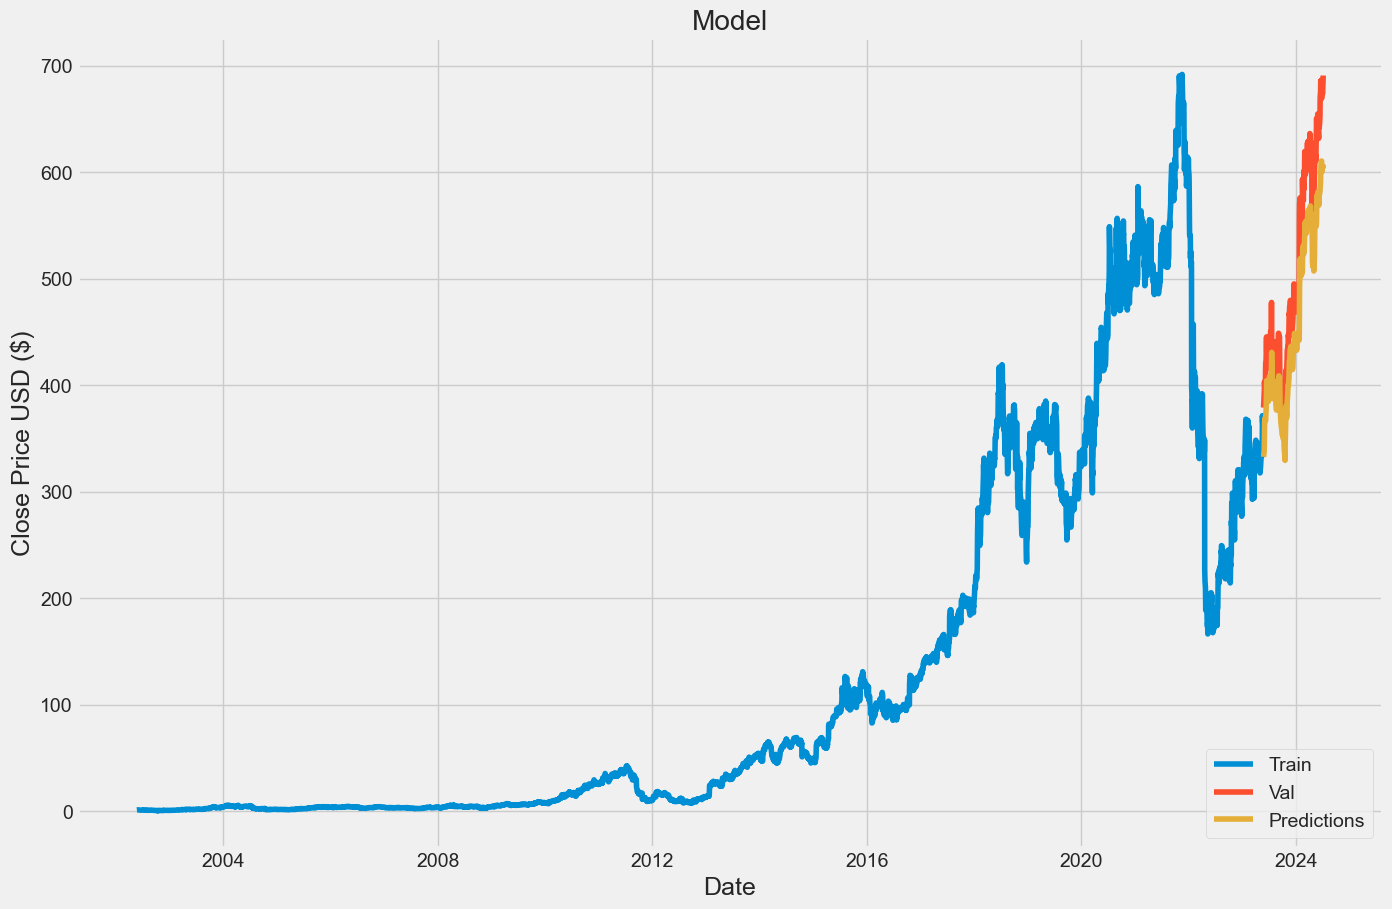

In [57]:
#plot the data 

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions


#visualise the data
plt.figure(figsize = (15,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [58]:
#show the valid and predicted values 

valid

,Adj Close,Predictions
Date,,
2023-05-26,378.880005,332.611298
2023-05-30,392.980011,338.258179
2023-05-31,395.230011,349.148407
2023-06-01,403.130005,358.263702
2023-06-02,400.470001,365.746613
...,...,...
2024-06-28,674.880005,604.603821
2024-07-01,673.609985,605.031006
2024-07-02,679.580017,603.894348


#### Predicting the closing price of Google LLC

In [59]:
#get the stock quote (GOOG listing date 19 Aug. 2004)

df = pdr.get_data_yahoo ('GOOG', start = '2004-08-19', end = datetime.now())

#show data 
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


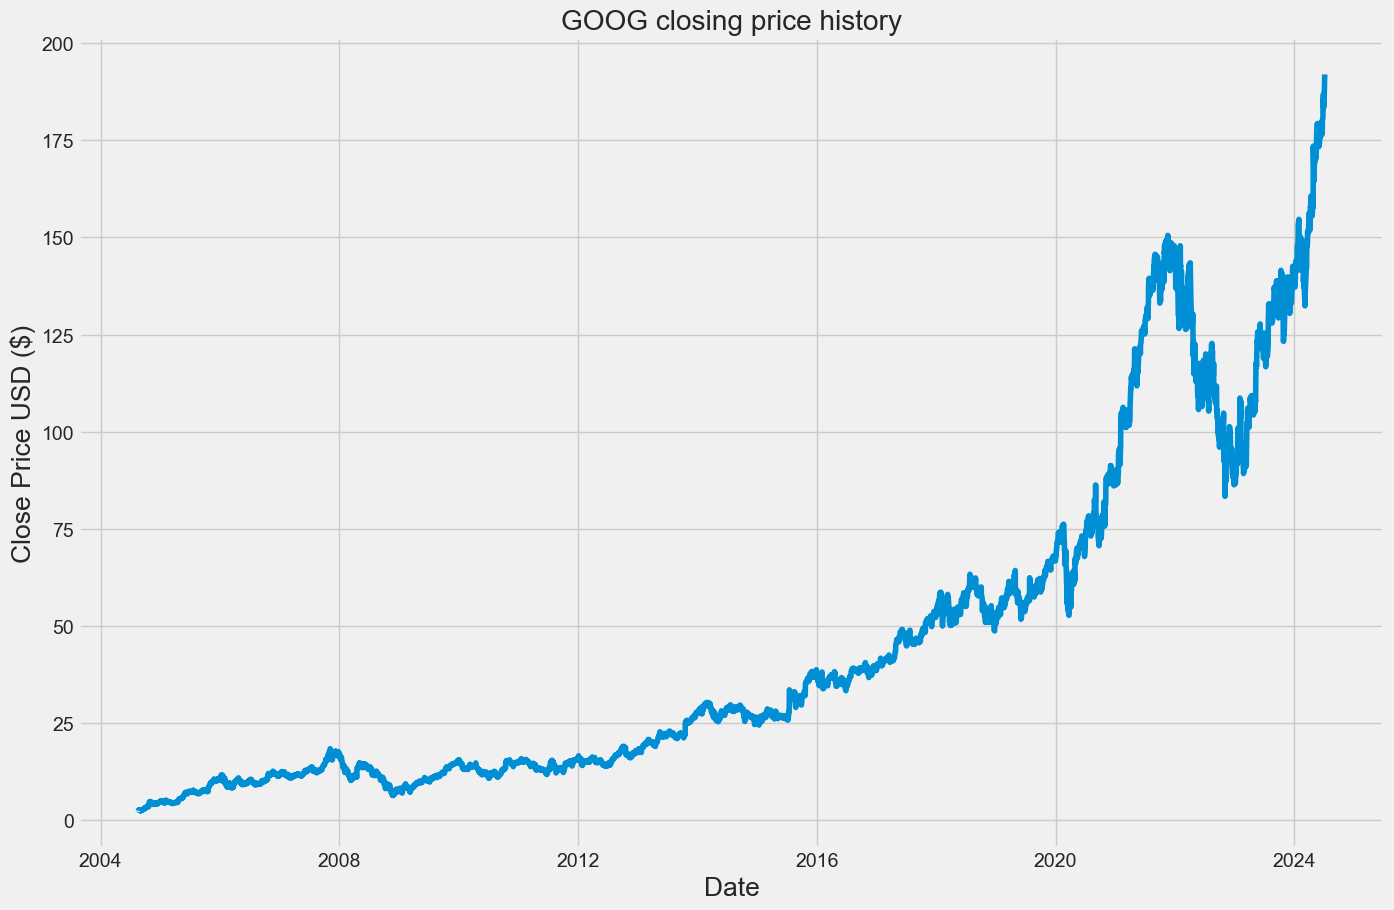

In [60]:
#plotting the closing price history of GOOG

plt.figure(figsize = (15,10))
plt.title("GOOG closing price history")
plt.plot(df['Adj Close']) 
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Close Price USD ($)', fontsize = 19)
plt.show()

In [61]:
#creating a new data frame with only 'Adj Close' column 

data = df.filter(['Adj Close'])

#convert dataframe to numpy array 

dataset = data.values 

#get the number of rows and columns to train the model 

training_data_len = int(np.ceil(len(dataset) *0.95))

training_data_len

4753

In [62]:
#scale the data 

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.33344361e-05],
       [1.08982370e-03],
       [1.23294386e-03],
       ...,
       [9.71763595e-01],
       [9.75880293e-01],
       [1.00000000e+00]])

In [63]:
#create the scaled training dataset 

train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train datasets 

x_train = []
y_train = []

for  i  in range (60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61: 
        print(x_train)
        print(y_train)
        print() 
        
#convert x_train and y_train to numpy datasets 

x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([4.33344361e-05, 1.08982370e-03, 1.23294386e-03, 6.38137888e-04,
       7.86509068e-04, 1.03730092e-03, 8.06204480e-04, 2.62610105e-04,
       3.09878087e-04, 3.15149240e-05, 1.96955377e-04, 0.00000000e+00,
       2.06148750e-04, 3.00689747e-04, 3.02000929e-04, 6.98537822e-04,
       9.83464445e-04, 1.50736844e-03, 1.57433183e-03, 1.83299833e-03,
       2.29518995e-03, 2.54072575e-03, 2.34114423e-03, 2.41204495e-03,
       2.73243136e-03, 2.60243812e-03, 2.39629440e-03, 3.52550263e-03,
       4.07960408e-03, 3.88527358e-03, 4.27655946e-03, 4.60218934e-03,
       5.03680462e-03, 4.86742559e-03, 5.09982943e-03, 4.95277195e-03,
       4.62845325e-03, 4.90944255e-03, 5.36900300e-03, 5.51343560e-03,
       5.79048632e-03, 6.45357064e-03, 6.29338121e-03, 5.31516778e-03,
       6.48245565e-03, 9.50900701e-03, 1.14746172e-02, 1.07393184e-02,
       1.12868564e-02, 1.22493092e-02, 1.19000416e-02, 1.26077652e-02,
       1.24554567e-02, 1.20352821e-02, 1.11200972e-02, 9.10458667e-03,
     

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model 

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

C:\Users\Tushar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4693/4693 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - loss: 0.0021


In [65]:
#creating the test dataset 

test_data = scaled_data[training_data_len - 60: , :]

#creating the x_test and y_test datasets 

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#convert the data to numpy array 

x_test = np.array(x_test)

#reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean square error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


3.992876066567126

C:\Users\Tushar\AppData\Local\Temp\ipykernel_14532\1279182370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


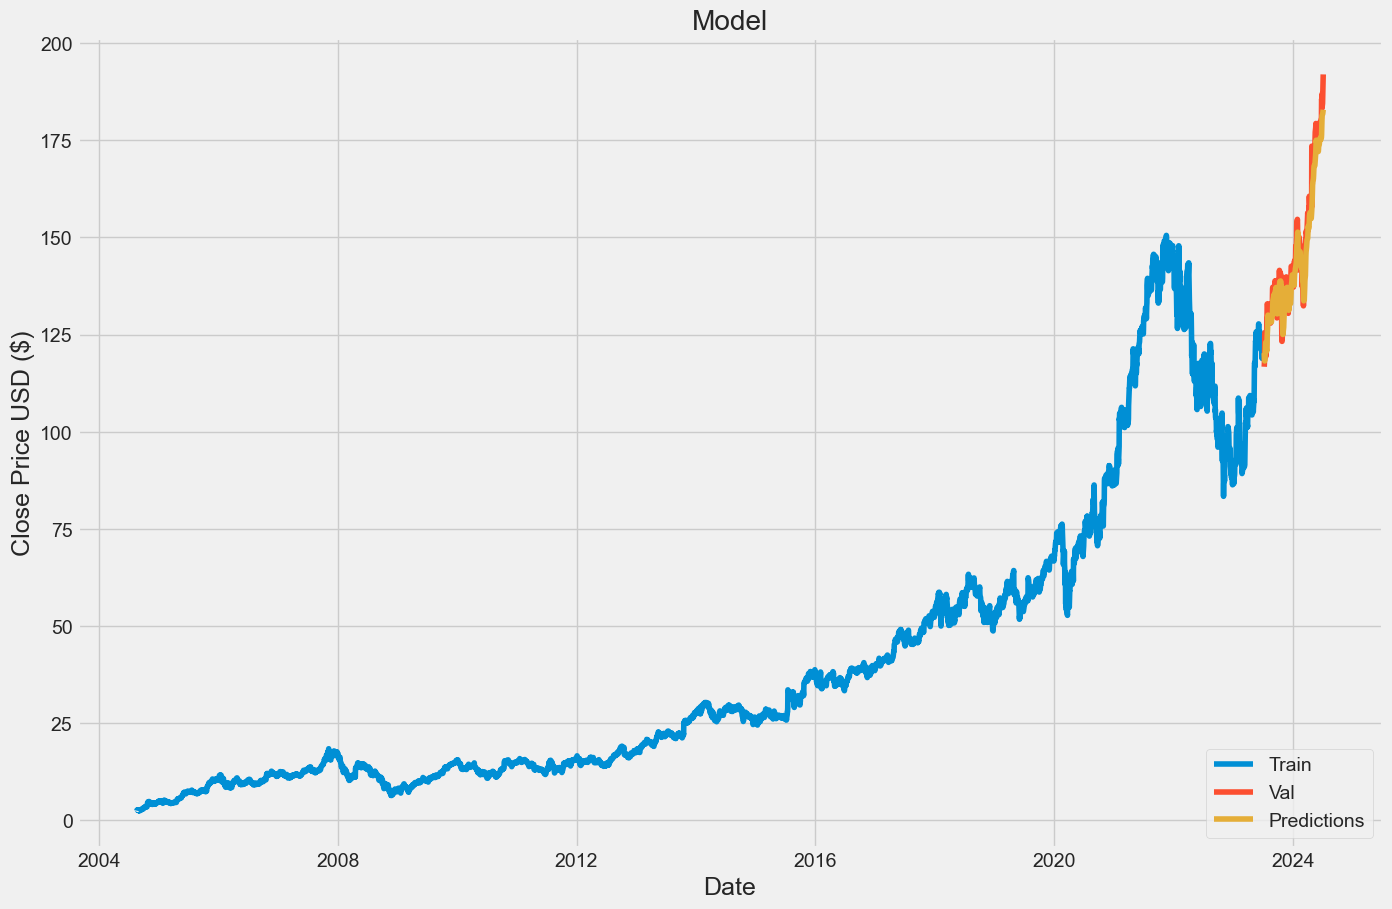

In [66]:
#plot the data 

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions


#visualise the data
plt.figure(figsize = (15,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [67]:
#show the valid and predicted values 

valid

,Adj Close,Predictions
Date,,
2023-07-10,116.737160,120.232254
2023-07-11,117.576202,119.303223
2023-07-12,119.484032,118.456924
2023-07-13,124.688110,118.221260
2023-07-14,125.557121,119.376732
...,...,...
2024-06-28,183.419998,181.330017
2024-07-01,184.490005,181.706299
2024-07-02,186.610001,181.820572
